In [304]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import sys

In [1056]:
def get_test_train_with_header(location):
    location = '~/Documents/SMAI/Assignment2/' + location
    dataframe = pd.read_csv(location)
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    train  = dataframe[:int(0.8*len(dataframe))]
    test = dataframe[int(0.8*len(dataframe)):]
    return test,train


### Mean Squred Error With L1 Regularization

$Cost(B) = \dfrac{1}{2m}\sum{(\beta^TX - Y)^2} + \dfrac{\lambda}{2m}\sum{|\beta|}$

Where $\beta$ is the vector of slopes,<br>
$Y$ is the predicted value,<br>
$m$ is the total number of samples<br>
$\lambda$ is the regularization coefficient

### Mean Squred Error With L2 Regularization

$Cost(B) = \dfrac{1}{2m}\sum{(\beta^TX - Y)^2} + \dfrac{\lambda}{2m}\sum{\beta^2}$

Where $\beta$ is the vector of slopes,<br>
$Y$ is the predicted value,<br>
$m$ is the total number of samples<br>
$\lambda$ is the regularization coefficient

In [1014]:
'''
USED IN LINEAR REGRESSION
'''
def MeanSquaredError(X,B,Y,lamb,reg='L0'):
    m = X.shape[0]
    cost = (1/(m))*np.sum((X.dot(B) - Y)**2)
    return(cost)

### L1 Regularization Gradient Descent

$\beta_i = \beta_i - \alpha\ast\dfrac{1}{m}(\sum_{m \in M}(\beta_i^TX_m - Y)X_i + \lambda * \dfrac{|\beta|}{\beta})$ <br>

where $X_i$ is the gradient, $\beta_i^TX$ is the hypothesis, $Y$ is the true value and $\beta_i$ is the slope of the $i^{th}$ feature. This step updates the slope by calculating the new slope by minimizing cost by differentiating one of the cost functions above.


### L2 Regularization Gradient Descent

$\beta_i = \beta_i - \alpha\ast\dfrac{1}{m}(\sum_{m \in M}(\beta_i^TX_m - Y)X_i + \lambda * \beta)$ <br>

where $X_i$ is the gradient, $\beta_i^TX$ is the hypothesis, $Y$ is the true value and $\beta_i$ is the slope of the $i^{th}$ feature. This step updates the slope by calculating the new slope by minimizing cost by differentiating one of the cost functions above.

In [1015]:
'''
USED IN LINEAR REGRESSION
'''
def gradient_descent(X,B,Y,alpha,lamb,reg='L0'):
    m = len(Y)
    cost = 0
    for i in range(1000):
        #print(B)
        if reg == 'L2': 
            bias = B[0]
            B -= alpha*(1/m)*((X.T.dot((X.dot(B) - Y))) + lamb*2*B)
            B[0] = B[0] + alpha*(lamb*2*bias)*(1/m)
        elif reg == 'L1':
            bias = B[0]
            B -= alpha*(1/m)*((X.T.dot((X.dot(B) - Y))) + lamb*np.sign(B))
            B[0] = B[0] + alpha*(lamb*np.sign(bias))*(1/m)
            #print(B[0])
        else:
            B -= alpha*(1/m)*(X.T.dot((X.dot(B) - Y)))
        #cost = cost_function(X,B,Y)
        #print(cost)
    return B,cost

## Linear Regression

Linear regression is one of the most widely used and easy to implement regression techniques. A regression technique such as linear regression is not used to classify but directly predict a value for given features.

### Algorithm

1. Initially, random slopes with respect to number of features is considered. It could be any number.<br><br>

2. Another matrix is considered which is the collection of features and it's values. This, with the slopes above tells you about a random line on a 2D plane. We have to use this line and the data pints in the data space to fit the line in such a away that it passes through the mean of all the points.<br><br>

3. There are error methods like Mean Squared error, Mean Absolute Error and Mean Absolute Percentage Error which are used to calculate the distance between out predicted point to the actual point.<br><br>

4. Using gradient descent, we can minimize the error such that our slope fits in the mean of our data.
   We continur this until our error funcion hits a minima.<br><br>

5. Now we can use R2 score to predict our accuracy. 

Formula for each functionalities is mentioned below.

In [1016]:
'''
USED IN LINEAR REGRESSION
'''
def predictLinear(test,train,target,B,lamb,reg='L0'):
    #print(test)
    X = []
    x0 = np.ones(test.shape[0])
    columns = test.shape[1]
    X.append(list(x0))
    for col in range(1,columns):
        if col!=target:
            #print(test[:,col])
            normalized_col = list(((test[:,col]) - np.mean(train[:,col]))/\
                                   ((np.std(train[:,col]))+np.finfo(float).eps))
            X.append(normalized_col)
    #print(X)
    X = np.array(X).T
    Y = np.array(test[:,target])
    predicted_y = X.dot(B)
    #score = r2_score(Y,predicted_y)
    err = MeanSquaredError(X,B,Y,lamb,reg)
    return X,predicted_y,err

In [1017]:
'''
USED IN LINEAR REGRESSION
'''
def LinearRegressionFit(test,train,target,lamb,reg='L0'):
    #get X matrx which consists all features
    X = []
    x0 = np.ones(train.shape[0])
    columns = train.shape[1]
    X.append(list(x0))
    for col in range(1,columns):
        if col!=target:
            normalized_col = list(((train[:,col]) - np.mean(train[:,col]))/\
                                   ((np.std(train[:,col]))+np.finfo(float).eps))
            X.append(normalized_col)       
    X = np.array(X).T
    B = np.array(np.zeros(columns-1))
    Y = np.array(train[:,target])
    alpha = 0.01
    B,cost = gradient_descent(X,B,Y,alpha,lamb,reg)
    return(B)

## Question - 1

In [1063]:
#location = '~/Documents/SMAI/Assignment2/AdmissionDataset/data.csv'
location = 'AdmissionDataset/data.csv'
test,train = get_test_train_with_header(location)
train = train.values
test = test.values
target = 8
lamb = 0
lambList=[]
errList=[]
terrList=[]
while lamb<50:
    slopeValues = LinearRegressionFit(np.array(test).copy(),np.array(train).copy(),target,lamb,'L1')
    X,predicted_y,err = predictLinear(np.array(test).copy(),np.array(train).copy(),\
                                                   target,slopeValues,lamb,'L1')
    X,predicted_y,terr = predictLinear(np.array(train).copy(),np.array(train).copy(),\
                                                   target,slopeValues,lamb,'L1')
    lambList.append(lamb)
    errList.append(err)
    terrList.append(terr)
    #print(err)
    lamb+=0.1

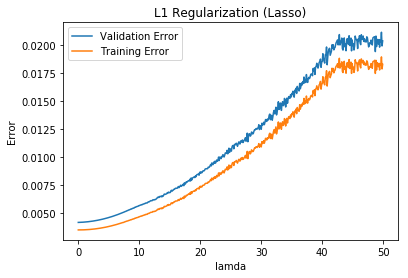

In [1064]:
plt.plot(lambList,errList,label="Validation Error")
plt.plot(lambList,terrList,label = "Training Error")
plt.xlabel("lamda")
plt.ylabel("Error")
plt.title("L1 Regularization (Lasso)")
plt.legend()
plt.show()

## Question - 2

In [1036]:
#location = '~/Documents/SMAI/Assignment2/AdmissionDataset/data.csv'
location = 'AdmissionDataset/data.csv'
test,train = get_test_train_with_header(location)
train = train.values
test = test.values
target = 8
lamb = 0
lambList=[]
errList=[]
valerrList = []
while lamb<70:
    slopeValues = LinearRegressionFit(np.array(test).copy(),np.array(train).copy(),target,lamb,'L2')
    X,predicted_y,err = predictLinear(np.array(test).copy(),np.array(train).copy(),\
                                      target,slopeValues,lamb,'L2')
    #print(err)
    X,predicted_y,verr = predictLinear(np.array(train).copy(),np.array(train).copy(),\
                                       target,slopeValues,lamb,'L2')
    lambList.append(lamb)
    errList.append(err)
    valerrList.append(verr)
    lamb+=0.1
#print("Error : ",err)

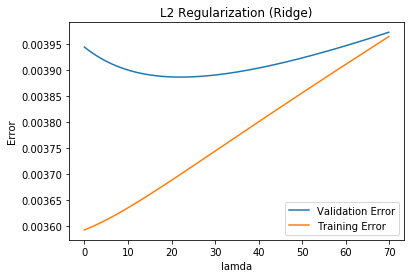

In [1037]:
plt.plot(lambList,errList,label='Validation Error')
plt.plot(lambList,valerrList,label = 'Training Error')
plt.xlabel("lamda")
plt.ylabel("Error")
plt.title("L2 Regularization (Ridge)")
plt.legend()
plt.show() 

## Question - 3

Lambda acts like a penalty to the weights (coefficients). With increase in lambda, the coefficients decrease rapidly, thus reducing the complexity of the hyperplane fitting the data. Since complexity of the hyperplane is directly proportional to the variance of different fits, we thus reduce the variance with increase in lamda values. For example, in the above graph (Ridge) somewhere about lambda = 20 we have a point where the validation error first decreases and then increases after the above lambda value. This is the point where we can say that both bias and the variance is low. 

## Question - 4

<b>Effect on weights:</b><br><br>

<b>Difference:</b><br><br>

## Question - 5

In [1070]:
location = '~/Documents/SMAI/Assignment2/AdmissionDataset/data.csv'
train = pd.read_csv(location)
train = train.values
target=8
klist = []
acclist = []
for knum in range(2,11,1):
    klist.append(knum)
    kf = KFold(n_splits=knum)
    sumk=0
    for train_index, test_index in kf.split(train):
        trainData = train[train_index]
        testData = train[test_index]
        slopeValues = LinearRegressionFit(testData,trainData,target,1,'L2')
        X,predicted_y,err = predictLinear(testData,trainData,target,slopeValues,1,'L2')
        sumk+=err
    acclist.append(sumK/knum-1)

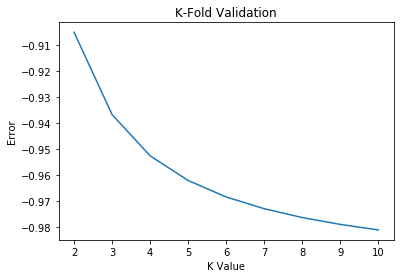

In [1071]:
plt.plot(klist,acclist)
plt.xlabel("K Value")
plt.ylabel("Error")
plt.title("K-Fold Validation")
plt.show()

Here we notice that as K value increases, the error decreases. This means that 

### LOOCV

In [1077]:
location = '~/Documents/SMAI/Assignment2/AdmissionDataset/data.csv'
train = pd.read_csv(location)
#train = get_test_train_with_header(location)
train = train.values
target=8
klist = []
acclist = []
kf = KFold(n_splits=train.shape[0])
j = 1
sumK=0
for train_index, test_index in kf.split(train):
    klist.append(j)
    size = len(train_index)
    trainData = train[train_index]
    
    testData = train[test_index]
    slopeValues = LinearRegressionFit(testData,trainData,target,0.3,'L2')
    X,predicted_y,err = predictLinear(testData,trainData,target,slopeValues,0.3,'L2')
    acclist.append(err)
    sumK+=err
    j+=1
meanlist = [sumK/(train.shape[0]-1) for i in range(0,train.shape[0])]

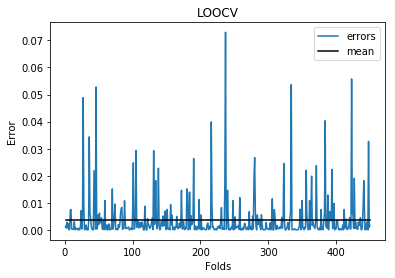

In [1089]:
plt.plot(klist,acclist,label = "errors")
plt.plot(klist,meanlist,c='black',label="mean")
plt.xlabel("Folds")
plt.ylabel("Error")
plt.title("LOOCV")
plt.legend()
plt.show()